
<a target="_blank" href="https://colab.research.google.com/github/robgen/HEDSpython/blob/main/Tutorial_7_solutions.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#**Supervised Learning - Linear Regression**

Linear regression the simplest and most commonly used statitical method for predictive analysis and machine learning.

Linear regression predicts the value of a variable given the value of other variables assuming that the relationship between the outcome variable and the predictors is linear.

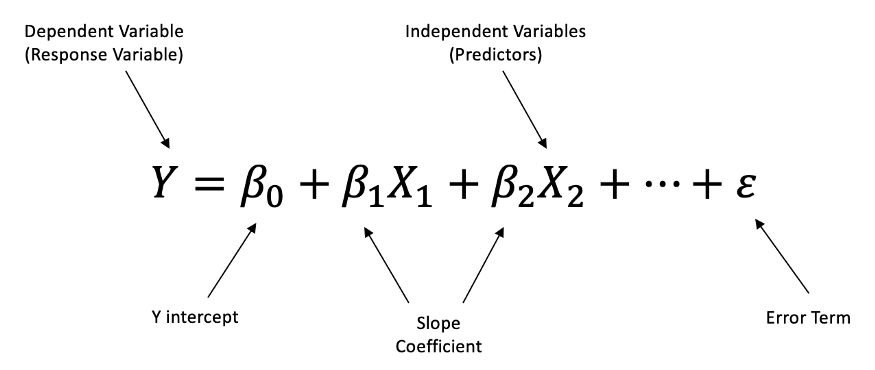

Image from: https://medium.com/swlh/understanding-multiple-linear-regression-e0a93327e960.

Let's import our libraries.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Then upload and explore our data.

In [2]:
filePath = 'https://raw.githubusercontent.com/robgen/HEDSpython/refs/heads/main/files/weatherHistory.csv'
weather = pd.read_csv(filePath)

In [3]:
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Now let's create a subset for the dataframe with the following features:

1. Summary
2. Humidity
3. Apparent Temperature (C)



In [5]:
temp = weather[["Humidity"]]
temp.head(10)

,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83
5,0.85
6,0.95
7,0.89
8,0.82
9,0.72


Convert the categorical variable (Summary) into an indicator variable.

In [6]:
dummies = pd.get_dummies(weather["Summary"])
dummies.head(12)

,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Concatenate the two datasets `temp1` and `dummies` to create a single dataframe `X`.

In [7]:
X = pd.concat([temp,dummies],axis=1)
X.head(12)

,Humidity,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0.89,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.86,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0.89,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0.83,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.83,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,0.85,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,0.95,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,0.89,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,0.82,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9,0.72,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Let's take a look at the columns in our dataset

In [8]:
number = 0
for col in X.columns:
  number += 1
  print('Column Name ', number, ':', col)

Column Name  1 : Humidity
Column Name  2 : Breezy
Column Name  3 : Breezy and Dry
Column Name  4 : Breezy and Foggy
Column Name  5 : Breezy and Mostly Cloudy
Column Name  6 : Breezy and Overcast
Column Name  7 : Breezy and Partly Cloudy
Column Name  8 : Clear
Column Name  9 : Dangerously Windy and Partly Cloudy
Column Name  10 : Drizzle
Column Name  11 : Dry
Column Name  12 : Dry and Mostly Cloudy
Column Name  13 : Dry and Partly Cloudy
Column Name  14 : Foggy
Column Name  15 : Humid and Mostly Cloudy
Column Name  16 : Humid and Overcast
Column Name  17 : Humid and Partly Cloudy
Column Name  18 : Light Rain
Column Name  19 : Mostly Cloudy
Column Name  20 : Overcast
Column Name  21 : Partly Cloudy
Column Name  22 : Rain
Column Name  23 : Windy
Column Name  24 : Windy and Dry
Column Name  25 : Windy and Foggy
Column Name  26 : Windy and Mostly Cloudy
Column Name  27 : Windy and Overcast
Column Name  28 : Windy and Partly Cloudy


Select the variable you want to predict (y).

In [9]:
y = weather["Apparent Temperature (C)"]

Split the datasets into Training and Testing (conventionally we use 30-20% for testing & 70-80% for training but you can do the split differently too)
 1. Training dataset (X_train, y_train) --> These datasets are used to fit the regression model
 2. Testing  dataset (X_test, y_test)   --> **X_test** is used to predict the dependent variable, while **y_test** is used to evaluate the confidence of the model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

Let's fit the regression model using the functions `LinearRegression()`
and `fit()`.

In [11]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)

LinearRegression()

Now we can use the fitted model to predict the y values in our X_test dataset.

In [12]:
y_prediction= regressionModel.predict(X_test)

We can now look at how the predicted values do against the true values in y_test to visualize the performance of our model.

In [13]:
result = pd.DataFrame(y_test)
result["y_predict"] = y_prediction
print(result.head(20))

       Apparent Temperature (C)  y_predict
6119                  14.422222   5.713428
51443                 12.155556  11.725470
18754                 23.961111  14.874634
34070                 15.000000   7.431154
26082                 12.800000  10.294031
75095                 11.088889   8.467832
29781                 -2.944444   8.862593
68559                 12.733333   8.290017
71611                 27.916667  18.487902
62588                 20.211111  11.616997
10563                 -6.550000   4.572144
33377                 11.111111   9.435168
58075                 12.500000  22.782217
65232                 16.138889   5.653045
66778                 12.155556  17.056463
22277                 16.488889   5.939332
4681                  18.400000   5.366757
32571                 11.666667  10.185559
25662                 15.027778  10.007744
19214                  4.955556   6.342694


And plot the predictions of our model (blue) over the true data points (black).

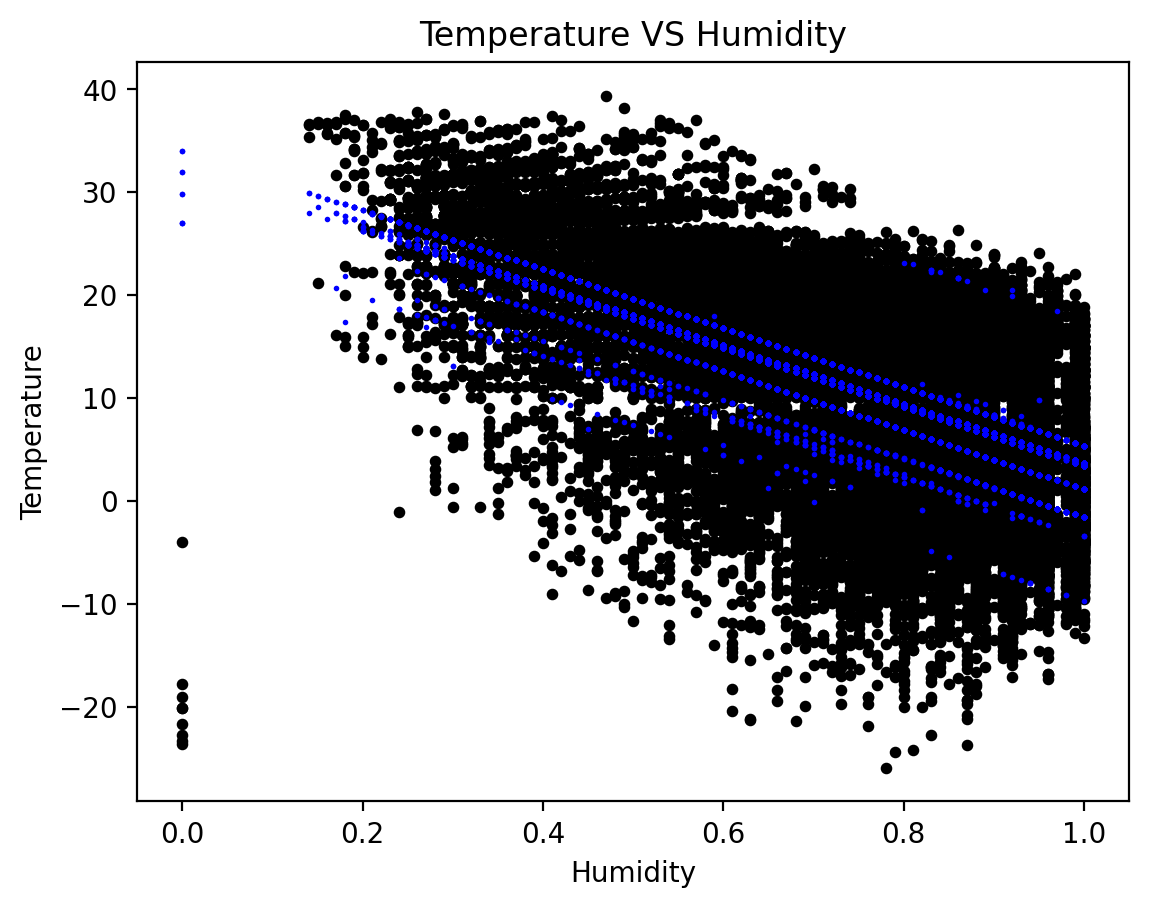

In [14]:
plt.figure(dpi=200)
plt.scatter(X_test['Humidity'], y_test, color='black', s=10)
plt.scatter(X_test["Humidity"], y_prediction , color='blue', s=1)
plt.title('Temperature VS Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

We can see that the model reflects a similar downward trend although it does not represent a great fit for the data.

We can also plot the actual values vs. predicted ones. Ideally, if the predictions are perfect the point will lie on a straight line with slope 1.

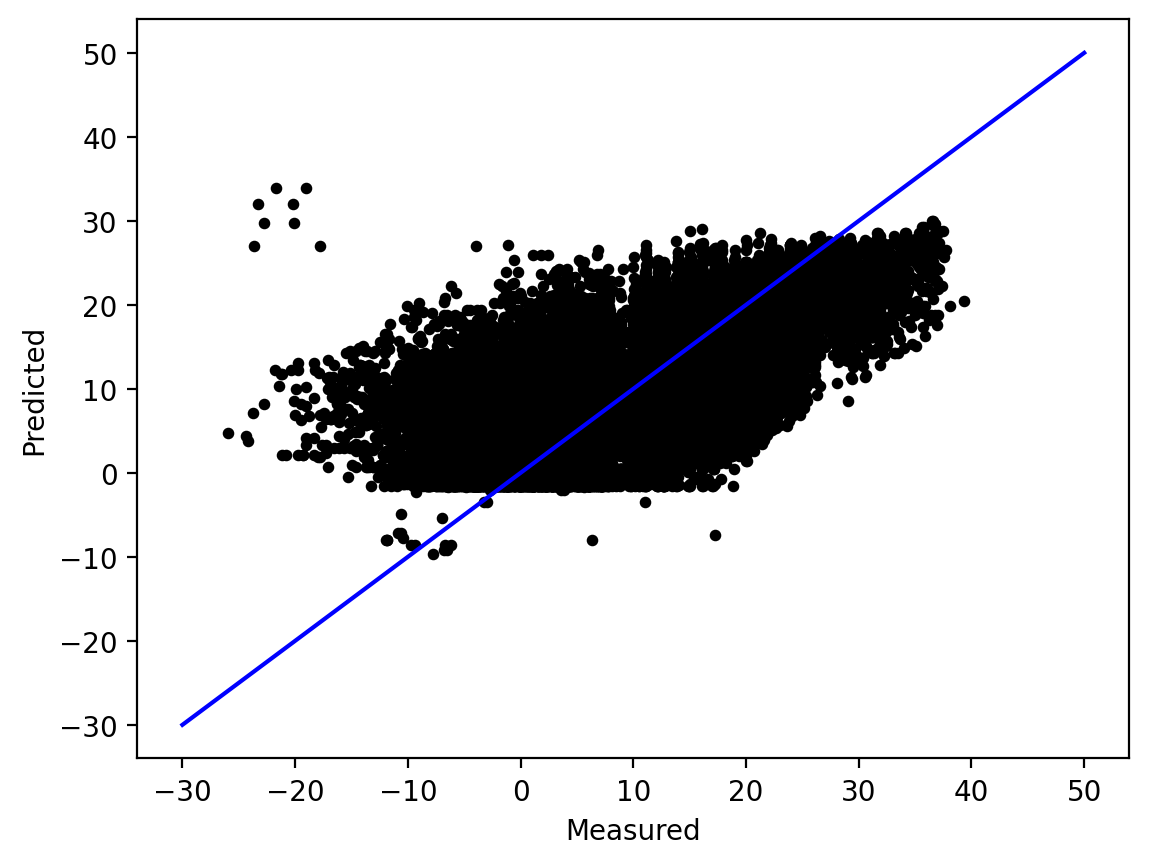

In [15]:
plt.figure(dpi=200)
plt.scatter(y_test, y_prediction, color='black', s=10)
plt.plot([-30, 50], [-30, 50], color='blue')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

The plot does not look like a line with slope 1 so our predictions look far from perfect.

A metric for the accuracy of your model is the **R-squared**. The **R-squared** is measured the proportion of variance in the dependent variable that can be explained by the independent variable.

A good R-squared is above 0.7.

In [16]:
R_squared = regressionModel.score(X_test,y_test)
print('R_squared', R_squared)

R_squared 0.4015448194866279


We got an R-squared of 40%. Our model seems to be doing quite bad.

##**Understanding the relationship between variables**

Regression is a powerful machine learning tool which can be used for prediction but also for estimating relationships between variables and their confidence levels.

The **scikit-learn (sklearn)** library is designed primarily for making predictions and does not provide statistical significance for estimated relationships between variables. To access this information we use a different Python library called **statsmodels**, which provides a detailed summary table of the fitted model allowing us to interpret the relationships between variables.

In [17]:
import statsmodels.api as sm

Because our goal here is estimation, we use the whole dataset without splitting it into training and test sets.

In [18]:
# fit model
mod = sm.OLS(y.astype(float), X.astype(float)).fit()

In [19]:
# provide model summary
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.400
Model:                                  OLS   Adj. R-squared:                  0.400
Method:                       Least Squares   F-statistic:                     2381.
Date:                      Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                              09:43:26   Log-Likelihood:            -3.4081e+05
No. Observations:                     96453   AIC:                         6.817e+05
Df Residuals:                         96425   BIC:                         6.820e+05
Df Model:                                27                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Humidity                              -28.5908      0.155   -185.045      0.000     -28.894     -28.288
Breezy                                 21.6223      1.132     19.101      0.000      19.404      23.841
Breezy and Dry                         28.5447      8.287      3.444      0.001      12.302      44.787
Breezy and Foggy                       19.4311      1.408     13.798      0.000      16.671      22.191
Breezy and Mostly Cloudy               26.8945      0.378     71.176      0.000      26.154      27.635
Breezy and Overcast                    25.3112      0.379     66.708      0.000      24.567      26.055
Breezy and Partly Cloudy               25.5943      0.430     59.502      0.000      24.751      26.437
Clear                                  31.9033      0.138    231.343      0.000      31.633      32.174
Dangerously Windy and Partly Cloudy    17.4928      8.287      2.111      0.035       1.250      33.736
Drizzle                                34.8271      1.334     26.112      0.000      32.213      37.441
Dry                                    34.8578      1.422     24.519      0.000      32.071      37.644
Dry and Mostly Cloudy                  32.8524      2.215     14.831      0.000      28.511      37.194
Dry and Partly Cloudy                  32.8673      0.894     36.749      0.000      31.114      34.620
Foggy                                  26.9728      0.177    152.735      0.000      26.627      27.319
Humid and Mostly Cloudy                45.8819      1.317     34.832      0.000      43.300      48.464
Humid and Overcast                     46.7159      3.135     14.901      0.000      40.571      52.861
Humid and Partly Cloudy                45.8369      2.014     22.757      0.000      41.889      49.785
Light Rain                             33.9517      1.053     32.242      0.000      31.888      36.016
Mostly Cloudy                          32.3553      0.122    264.225      0.000      32.115      32.595
Overcast                               29.7268      0.144    205.765      0.000      29.444      30.010
Partly Cloudy                          33.9372      0.110    307.178      0.000      33.721      34.154
Rain                                   36.6827      2.625     13.976      0.000      31.538      41.827
Windy                                  18.3773      2.931      6.269      0.000      12.632      24.122
Windy and Dry                          33.2062      8.287      4.007      0.000      16.964      49.449
Windy and Foggy                        35.5012      4.146      8.563      0.000      27.375      43.627
Windy and Mostly Cloudy                26.9088      1.404     19.168      0.000      24.157      29.660
W

As you can see, all the information about the model, including the R-squared, is provided in the summary table.

We interpret the regression coefficients as the expected change in **y** for a one-unit increase in **x**, assuming all other variables remain constant. For example:

---

*For a one-unit increase in humidity (x1), the apparent temperature (y) decreases by 28 units, holding all other variables constant.*

---

The **p-value** (P>|t|) helps us determine whether each coefficient is **statistically significant** (i.e., meaningfully different from zero).

Conventionally, a p-value below or equal to 0.05 is considered good evidence to reject the null hypothesis that the coefficient is equal to zero (i.e., of statistical significance).

In this case, all coefficients appear to be statistically significant, providing evidence that all predictive variables contribute to explaining the dependent variable.

##**Exercise - Simple Linear Regression**

Now let's look at the relationship between max and min temperature in the dataset `weather.csv`. This is called a Simple Linear Regression as one variable (and not multiple ones as above - Multiple Linear Regression) is used to predict another one.

Follow the same steps as above to run your analysis.

**Note:** You may encounter some new errors when you run your code. Read them carefully and try to find a solution on your own. Some of the above steps may not be needed in this case.

*1. Load the data and do some exploratory data analysis.*

In [20]:
filePath = 'https://raw.githubusercontent.com/robgen/HEDSpython/refs/heads/main/files/weather.csv'
weather = pd.read_csv(filePath)

<ipython-input-20-48e50755121b>:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv(filePath)


In [21]:
weather.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
weather.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


*2. Select your outcome variable and your predictor, and divide the data in training and test set (since we are dealing with two variables only, no further data manipulation is needed here).*

In [23]:
weather["MaxTemp"]

,MaxTemp
0,25.555556
1,28.888889
2,26.111111
3,26.666667
4,26.666667
...,...
119035,28.333333
119036,29.444444
119037,28.333333
119038,28.333333


In [24]:
y = weather["MaxTemp"]

In [25]:
X = weather["MinTemp"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=28)

*3. Fit a linear regression model and make predictions.*

***Note***: *in case you get an error regarding data dimensionality when fitting the model, you may need to reshape the data using the `.reshape(-1, 1)` method since we are dealing with a single column.*

In [27]:
X_train.shape

(95232,)

In [28]:
X_train = X_train.array.reshape(-1, 1)

In [29]:
y_train = y_train.array.reshape(-1, 1)

In [30]:
X_train.shape

(95232, 1)

In [31]:
y_train.shape

(95232, 1)

In [32]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)

LinearRegression()

*4. Plot your predictions on top of the the min and max temperature data.*


In [33]:
X_test = X_test.array.reshape(-1, 1)
y_test = y_test.array.reshape(-1, 1)

In [34]:
y_prediction= regressionModel.predict(X_test)

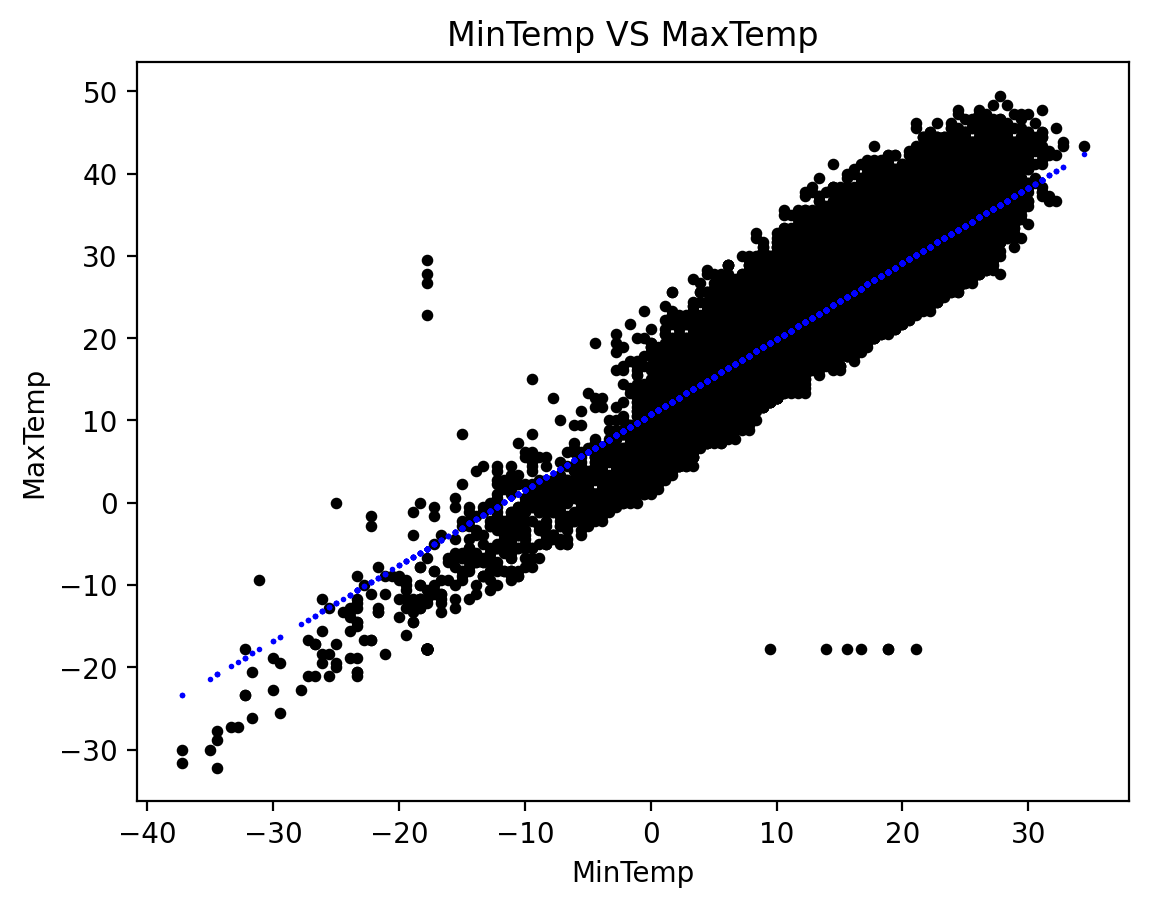

In [35]:
plt.figure(dpi=200)
plt.scatter(X_test, y_test, color='black', s=10)
plt.scatter(X_test, y_prediction , color='blue', s=1)
plt.title('MinTemp VS MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

*5. Plot the model predictions against the y-test values to visualize the performance of your model.*

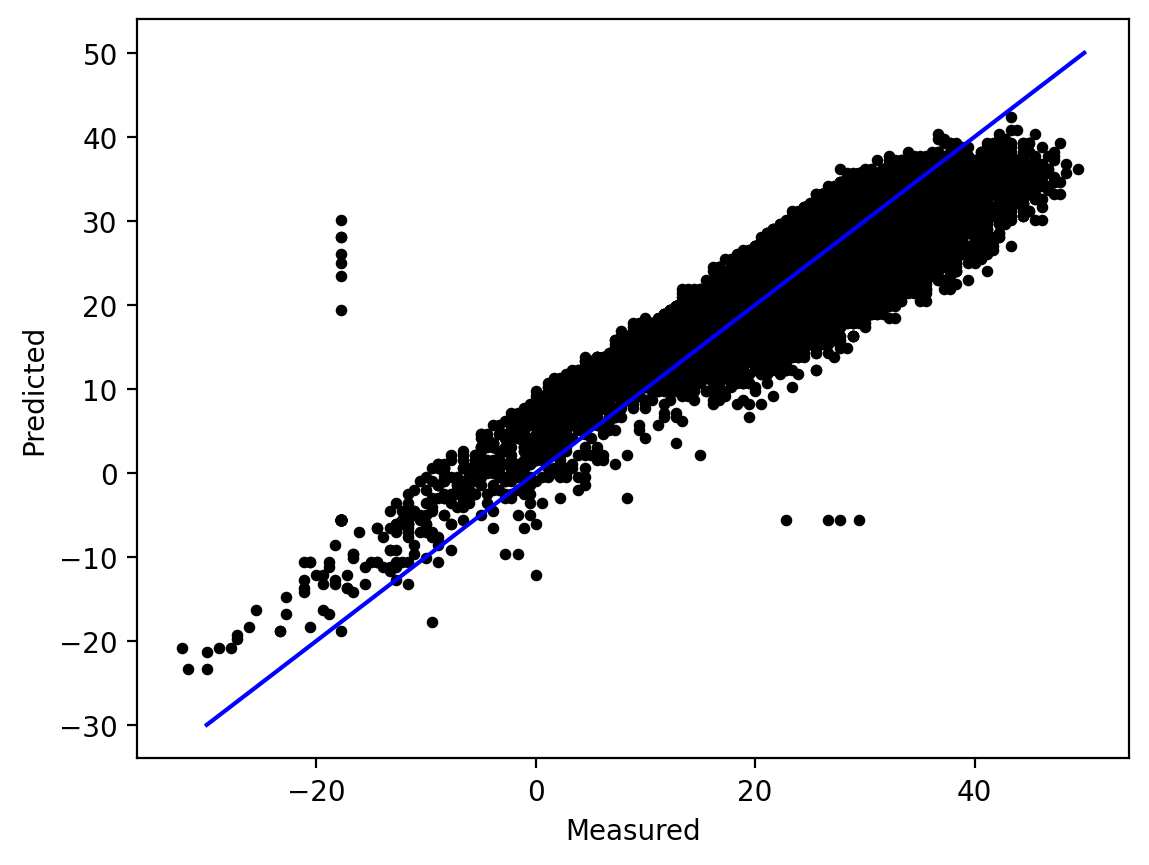

In [36]:
plt.figure(dpi=200)
plt.scatter(y_test, y_prediction, color='black', s=10)
plt.plot([-30, 50], [-30, 50], color='blue')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

*6. Check how well your model did using the R-squared.*

In [37]:
R_squared = regressionModel.score(X_test,y_test)
print('R_squared', R_squared)

R_squared 0.7756862559299644


*7. What will be the maximum temperature when the minimum temperature is 25 C° according to our model?*

In [38]:
pred_25 = regressionModel.predict([[25]])
print(pred_25)

[[33.66148788]]


*8. Produce and print the summary table for the regression results. Is the regression coefficient statistically significant? Provide an interpretation for it.*

In [40]:
mod = sm.OLS(y.astype(float), X.astype(float)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                MaxTemp   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          2.412e+06
Date:                Mon, 17 Mar 2025   Prob (F-statistic):                        0.00
Time:                        09:44:38   Log-Likelihood:                     -3.8537e+05
No. Observations:              119040   AIC:                                  7.708e+05
Df Residuals:                  119039   BIC:                                  7.708e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MinTemp        1.4120      0.001   1553.151      0.000       1.410       1.414
==============================================================================
Omnibus:                    16133.302   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36650.854
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.189   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**INTERPRETATION**: Given a p-value of 0.000 the regression coefficient is statistically significant. This allows us to say that there is some evidence of a relationship between minimum and maximum temperature such that for a one-unit increase in the minimum temperature (x), the apparent temperature (y) *increases* by 1.4 units.